In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [64]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [65]:
import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

In [66]:
# Flattening the images from the 32x32x3 pixels to 1D 3072 pixels
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [67]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [68]:
print(y_train[0])

[6]


In [69]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [70]:
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [71]:
#Creating base neural network
model = keras.Sequential([
    keras.layers.Dense(2048, activation='relu', input_shape=(3072,)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 2048)              6293504   
                                                                 
 dense_50 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_51 (Dense)            (None, 512)               524800    
                                                                 
 dense_52 (Dense)            (None, 10)                5130      
                                                                 
Total params: 8921610 (34.03 MB)
Trainable params: 8921610 (34.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


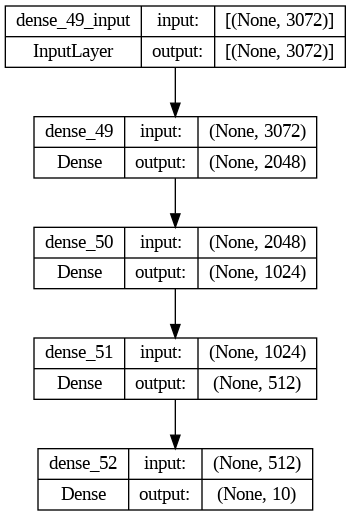

In [72]:
keras.utils.plot_model(model, show_shapes=True)

In [73]:
#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics = ['accuracy'])

In [74]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=40)

Epoch 1/40
250/250 [==============================] - 3s 7ms/step - loss: 1.9988 - accuracy: 0.2933
Epoch 2/40
250/250 [==============================] - 2s 6ms/step - loss: 1.6880 - accuracy: 0.3938
Epoch 3/40
250/250 [==============================] - 2s 8ms/step - loss: 1.6020 - accuracy: 0.4248
Epoch 4/40
250/250 [==============================] - 2s 7ms/step - loss: 1.5273 - accuracy: 0.4534
Epoch 5/40
250/250 [==============================] - 2s 6ms/step - loss: 1.4823 - accuracy: 0.4694
Epoch 6/40
250/250 [==============================] - 2s 6ms/step - loss: 1.4331 - accuracy: 0.4877
Epoch 7/40
250/250 [==============================] - 2s 6ms/step - loss: 1.3941 - accuracy: 0.5015
Epoch 8/40
250/250 [==============================] - 2s 6ms/step - loss: 1.3594 - accuracy: 0.5148
Epoch 9/40
250/250 [==============================] - 2s 6ms/step - loss: 1.3260 - accuracy: 0.5273
Epoch 10/40
250/250 [==============================] - 2s 7ms/step - loss: 1.2920 - accuracy: 0.5373

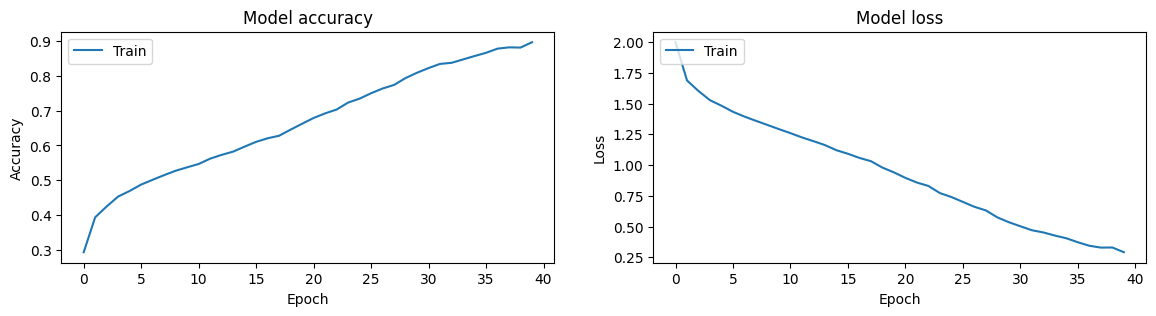

In [75]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [76]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.6786 - accuracy: 0.4997


In [77]:
print("Testing Accuracy : ", round(test_acc,4)*100, "%")

Testing Accuracy :  49.97 %


313/313 [==============================] - 1s 2ms/step


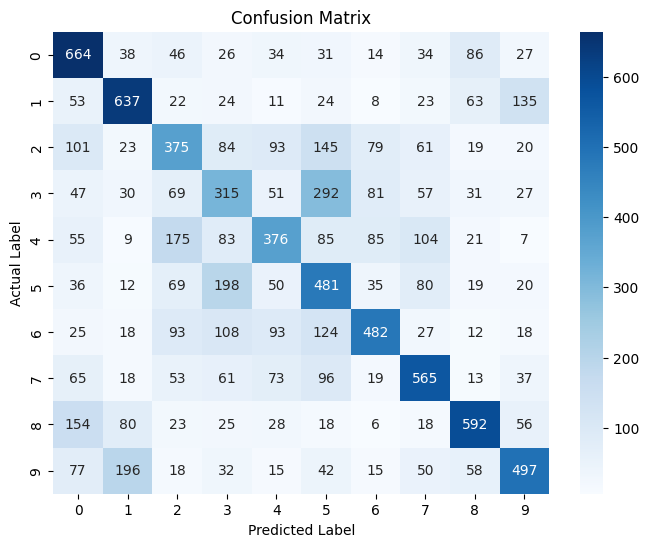

In [78]:
# plot the confusion matrix for the testing dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

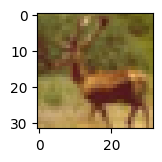

1/1 [==============================] - 0s 73ms/step
Actual number is  [4]
Predicted number is  4


In [79]:
import random
i = random.randint(1,10000)
plt.figure(figsize=(2, 1.5))
plt.imshow(X_test[i].reshape(32,32,3))
plt.show()

pred_num = model.predict(X_test[i].reshape(1, 3072)).argmax()
print("Actual number is ", y_test[i])
print("Predicted number is ", pred_num)